In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
tem = pd.get_dummies(df['region'])  # tem is a variable that stores the region one hot encoding
tem.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [7]:
df.drop('region', axis = 1, inplace=True)

In [8]:
df = pd.concat([df,tem], axis=1)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


In [9]:
# converting categorical data to numeric using map function
map = {'yes':1, 'no':0}
df['smoker']=df['smoker'].map(map)
map1 = {'female':0, 'male':1}
df['sex']=df['sex'].map(map1)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [10]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


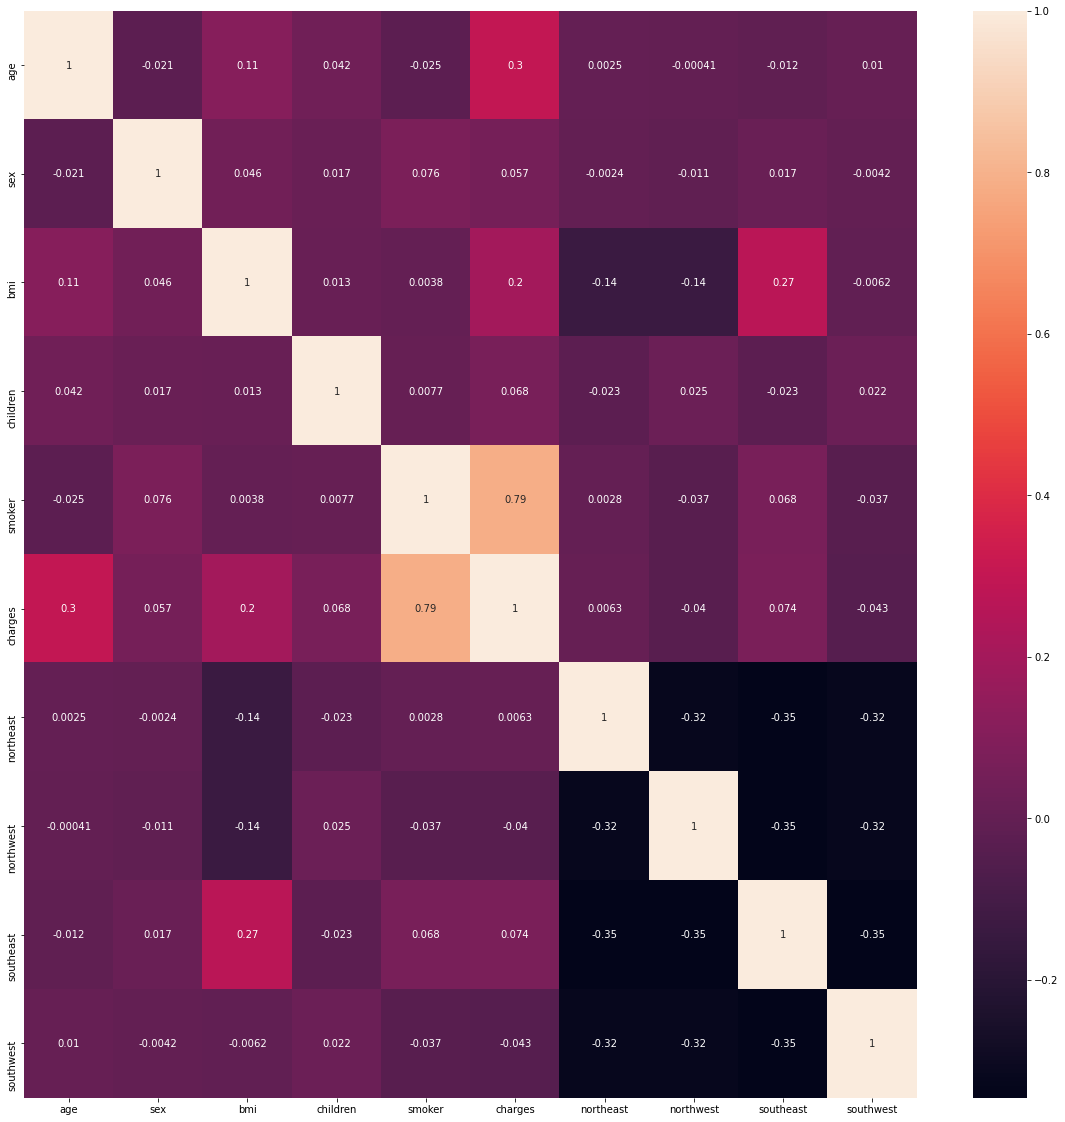

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

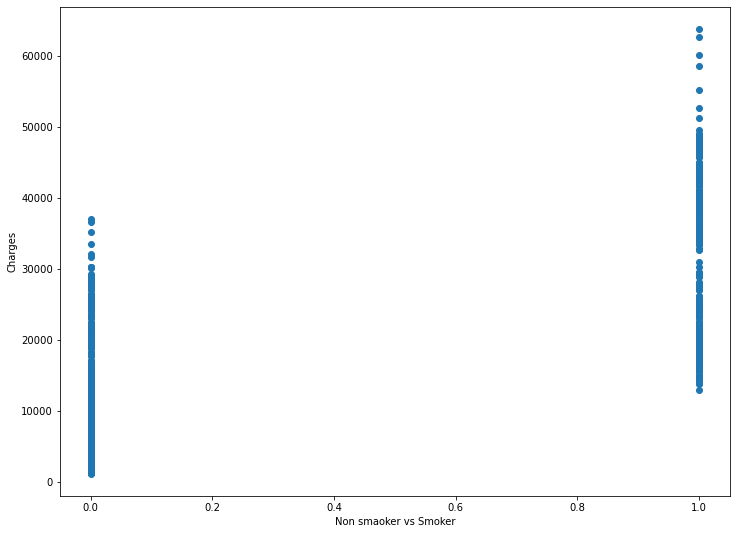

In [12]:
x = df['smoker']
y = df['charges']
plt.figure(figsize=(12,9))
plt.scatter(x,y)
plt.xlabel('Non smaoker vs Smoker')
plt.ylabel('Charges')
plt.show()

In [13]:
y = df['charges']
x = df.drop('charges', axis = 1)

In [14]:
x

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [15]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7623311844057112

In [19]:
p_x = x

In [20]:
from sklearn.preprocessing import PolynomialFeatures
pol= PolynomialFeatures(degree = 3)
p_x = pol.fit_transform(x)
p_x

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [21]:
x_train, x_test, y_train, Y_test = train_test_split(p_x, y, random_state = 1, test_size = 0.2)
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.842944364621211

In [22]:
from sklearn.model_selection import cross_val_score
c = cross_val_score(reg,p_x,y,cv=4)
c

array([0.84846302, 0.79022141, 0.85205271, 0.81596221])

In [23]:
# final mean accuracy
print("The mean Accuracy after cross validation is:",c.mean()*100, end="%")

The mean Accuracy after cross validation is: 82.66748374845896%